The given dataset comprises a diverse set of user metrics collected from an online platform, consisting of 1,000 user profiles with 16 distinct features. These features include demographics (age, gender, income level, and education), online behavior (likes and reactions, followed accounts, device usage), engagement with content (time spent online during weekdays and weekends, click-through rates, conversion rates), interaction with ads (ad interaction time), and user interests.

Your task is to develop a robust user profiling and segmentation system that leverages machine learning and data analysis techniques to categorize users into distinct segments. By analyzing user interaction data, demographic information, and engagement metrics, identify meaningful patterns and clusters within the user base. The ultimate goal is to enable businesses to tailor their advertising campaigns to the identified segments, thereby increasing ad relevance, user engagement, and conversion rates while optimizing ad spend.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/User Profiling/user_profiles_for_ads.csv')
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


**Columns in the dataset**

* **User ID**: Unique identifier for each user.
* **Age**: Age range of the user.
* **Gender**: Gender of the user.
* **Location**: User’s location type (Urban, Suburban, Rural).
* **Language**: Primary language of the user.
* **Education Level**: Highest education level achieved.
* **Likes and Reactions**: Number of likes and reactions a user has made.
* **Followed Accounts**: Number of accounts a user follows.
* **Device Usage**: Primary device used for accessing the platform (Mobile, Desktop, Tablet).
* **Time Spent Online (hrs/weekday)**: Average hours spent online on weekdays.
* **Time Spent Online (hrs/weekend)**: Average hours spent online on weekends.
* **Click-Through Rates (CTR)**: The percentage of ad impressions that lead to clicks.
* **Conversion Rates**: The percentage of clicks that lead to conversions/actions.
* **Ad Interaction Time (sec)**: Average time spent interacting with ads in seconds.
* **Income Level**: User’s income level.
* **Top Interests**: Primary interests of the user.

In [7]:
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

,0
User ID,0
Age,0
Gender,0
Location,0
Language,0
Education Level,0
Likes and Reactions,0
Followed Accounts,0
Device Usage,0
Time Spent Online (hrs/weekday),0


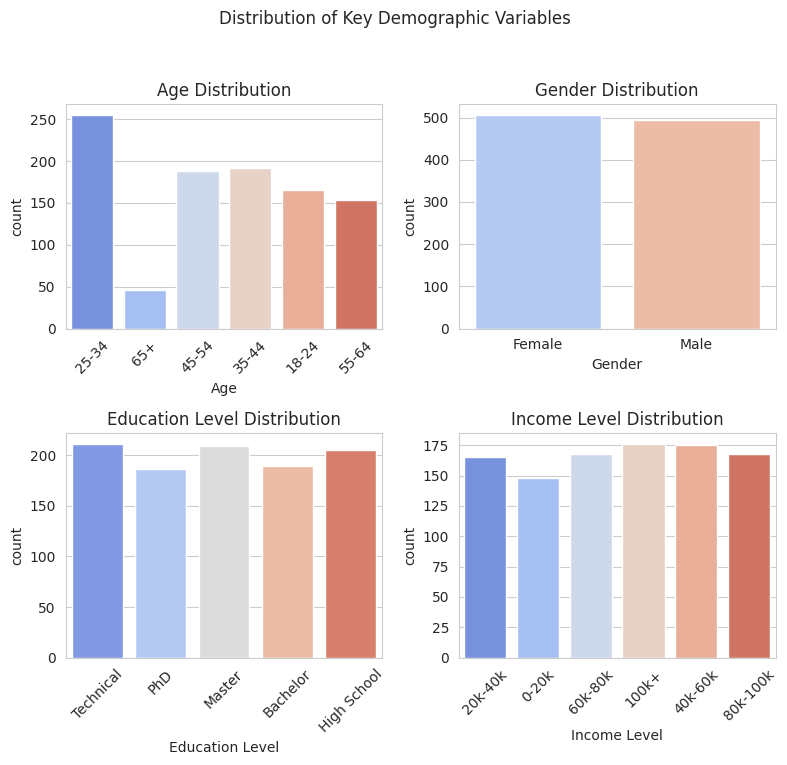

In [12]:
# setting the aesthetic style of the plots
sns.set_style("whitegrid")

# creating subplots for the demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Distribution of Key Demographic Variables')

# age distribution
sns.countplot(ax=axes[0, 0], x='Age', data=data, palette='coolwarm')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# gender distribution
sns.countplot(ax=axes[0, 1], x='Gender', data=data, palette='coolwarm')
axes[0, 1].set_title('Gender Distribution')

# education level distribution
sns.countplot(ax=axes[1, 0], x='Education Level', data=data, palette='coolwarm')
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# income level distribution
sns.countplot(ax=axes[1, 1], x='Income Level', data=data, palette='coolwarm')
axes[1, 1].set_title('Income Level Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

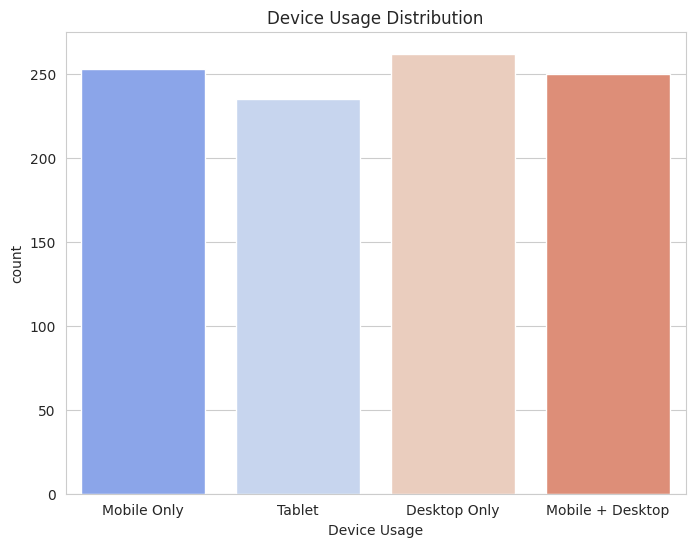

In [13]:
# device usage distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Device Usage', data=data, palette='coolwarm')
plt.title('Device Usage Distribution')
plt.show()

**Tasks**
* Analyze the average time users spend online on weekdays versus weekends.
* Investigate user engagement metrics, such as likes and reactions.
* Delve into ad interaction metrics, including Click-Through Rates (CTR), Conversion Rates, and Ad Interaction Time.

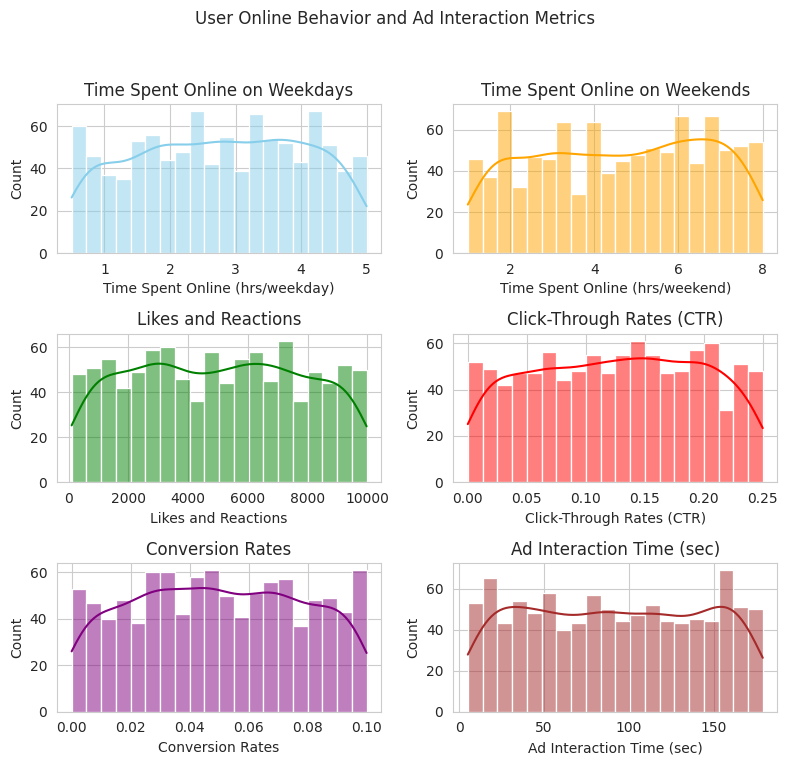

In [14]:
# creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

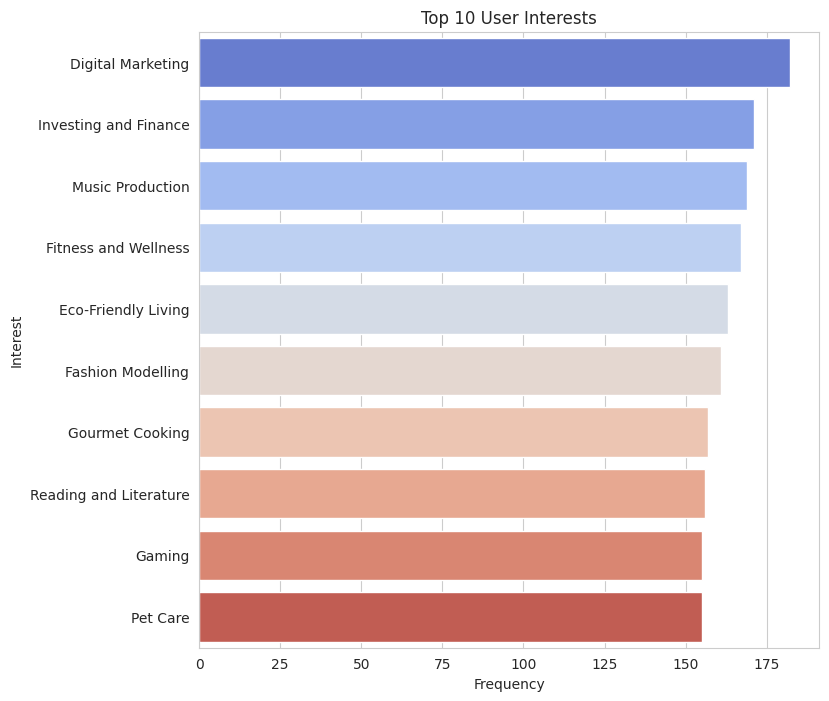

In [16]:
from collections import Counter

# splitting the 'Top Interests' column and creating a list of all interests
interests_list = data['Top Interests'].str.split(', ').sum()

# counting the frequency of each interest
interests_counter = Counter(interests_list)

# converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plotting the most common interests
plt.figure(figsize=(8, 8))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

**User Profiling and Segmentation**<br>
We can now segment users into distinct groups for targeted ad campaigns. Segmentation can be based on various criteria, such as:
* **Demographics**: Age, Gender, Income Level, Education Level
* **Behavioural**: Time Spent Online, Likes and Reactions, CTR, Conversion Rates
* **Interests**: Aligning ad content with the top interests identified<br>

To implement user profiling and segmentation, we can apply clustering techniques or develop personas based on the combination of these attributes. This approach enables the creation of more personalized and effective ad campaigns, ultimately enhancing user engagement and conversion rates.



In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# separating the features we want to consider for clustering
X = data[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

data.head().T

,0,1,2,3,4
User ID,1,2,3,4,5
Age,25-34,65+,45-54,35-44,25-34
Gender,Female,Male,Female,Female,Female
Location,Suburban,Urban,Suburban,Rural,Urban
Language,Hindi,Hindi,Spanish,Spanish,English
Education Level,Technical,PhD,Technical,PhD,Technical
Likes and Reactions,5640,9501,4775,9182,6848
Followed Accounts,190,375,187,152,371
Device Usage,Mobile Only,Tablet,Mobile Only,Desktop Only,Mobile Only
Time Spent Online (hrs/weekday),4.5,0.5,4.5,3.1,2.0


The clustering process has successfully segmented our users into five distinct groups (Clusters 0 to 4). Each cluster represents a unique combination of the features we selected, including age, gender, income level, online behaviour, and engagement metrics. These clusters can serve as the basis for creating targeted ad campaigns tailored to the preferences and behaviours of each segment.

We’ll compute the mean values of the numerical features and the mode for categorical features within each cluster to get a sense of their defining characteristics:

In [23]:
# computing the mean values of numerical features for each cluster
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

cluster_means.round(2).T

Cluster,0,1,2,3,4
Time Spent Online (hrs/weekday),3.91,1.56,3.02,3.08,1.81
Time Spent Online (hrs/weekend),5.21,6.0,2.58,5.77,3.84
Likes and Reactions,2409.62,5005.12,6861.59,7457.6,3021.22
Click-Through Rates (CTR),0.15,0.18,0.17,0.07,0.06
Age,25-34,35-44,25-34,25-34,45-54
Gender,Female,Male,Male,Female,Female
Income Level,80k-100k,80k-100k,20k-40k,100k+,0-20k


Now, we’ll assign each cluster a name that reflects its most defining characteristics based on the mean values of numerical features and the most frequent categories for categorical features. Based on the cluster analysis, we can summarize and name the segments as follows:

* **Cluster 0 – “Weekend Warriors”:** High weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 80k-100k.
* **Cluster 1 – “Engaged Professionals”:** Balanced online activity, high likes and reactions, predominantly male, age group 25-34, high income (100k+).
* **Cluster 2 – “Low-Key Users”:** Moderate to high weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 60k-80k, lower CTR.
* **Cluster 3 – “Active Explorers”:** High overall online activity, lower likes and reactions, predominantly female, age group 25-34, income level 60k-80k.
* **Cluster 4 – “Budget Browsers”:** Moderate online activity, lowest likes and reactions, predominantly female, age group 25-34, lowest income level (0-20k), lower CTR.

In [27]:
# preparing data for radar chart
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

# creating a dataframe for the radar chart
radar_df = cluster_means[features_to_plot].reset_index()

# normalizing the data
radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

# adding a full circle for plotting
# Use pandas.concat instead of append, which is deprecated
radar_df_normalized = pd.concat([radar_df_normalized, radar_df_normalized.iloc[[0]]], ignore_index=True)
# radar_df_normalized = radar_df_normalized.append(radar_df_normalized.iloc[0]) # Deprecated

# assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']

In [28]:
import plotly.graph_objects as go
fig = go.Figure()

# loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + [radar_df_normalized.iloc[i][features_to_plot].values[0]],  # Add the first value at the end to close the radar chart
        theta=labels.tolist() + [labels[0]],  # add the first label at the end to close the radar chart
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])]+[f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]  # Adding hover text for each feature
    ))

# update the layout to finalize the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='User Segments Profile'
)
